In [1]:
import sif_parser
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# These commands make plots look publication quality utilizing the SciencePlots package
# https://pypi.org/project/SciencePlots/
plt.style.use(["science", "nature", "bright"])
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams["font.size"] = 11

# Create a custom color map
colors = ["#FFFFFF","#882E72","#1965B0","#7BAFDE","#4EB265","#CAE0AB","#F7F056","#DC050C"]
my_cmap = LinearSegmentedColormap.from_list("cmap_b", colors)

In [2]:
def get_data(filename):
    """Parses data from a given .sif file
    Input:
    filename (string): Relative directory of a .sif file

    Returns:
    image (np.array): 2D array of the raw image
    fvb (np.array): 1D spectrum from summing over every column
    """
    data, _ = sif_parser.np_open(filename)
    accumulations = 25
    image = data[0,:,:] / accumulations
    fvb = np.sum(image, axis=0)
    # fvb = fvb[100:1024]
    fvb = fvb - np.min(fvb)
    # don't normalize when comparing relative intensities
    # fvb = fvb / np.max(fvb)

    return image, fvb

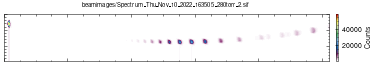

In [3]:
# Change this file directory to plot a data set
currentfile="beamimages/Spectrum_Thu_Nov_10_2022_163505_280torr_2.sif"

current_image, current_spectrum = get_data(currentfile)

plt.figure(figsize=(6,1))

ax = plt.gca()

plt.imshow(current_image[400:550,:], cmap=my_cmap) # can play with indices to crop the diffraction

plt.suptitle(f"{currentfile}", fontsize=6)
plt.colorbar(fraction=0.007, pad=0.02, label="Counts") # can play with fraction to fix colorbar size
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.savefig("figures/testsif.jpg", dpi=800)

plt.show()

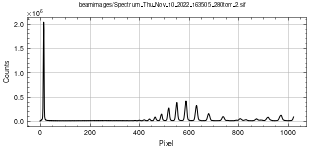

In [4]:
# Plot raw spectrum
plt.figure(figsize=(5,2))

plt.plot(current_spectrum, color="k")
plt.grid(True)

# plt.ylabel("Intensity (arb)")
plt.ylabel("Counts")
plt.xlabel("Pixel")
plt.suptitle(f"{currentfile}", fontsize=6)
# plt.yscale("log")
# plt.ylim(0, 1)
# plt.xlim(300,1024)
# plt.ylim(0.005,1)

# plt.savefig(f"figures/currentfile_spectrum_raw.jpg", dpi=800)

plt.show()

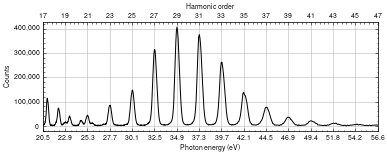

In [9]:
# Convert pixels to mm (DC is set to the origin)
num_pixels = 1024
detector_width_mm = 13.3

pixels = np.arange(num_pixels)
dc_pixel = np.argmax(current_spectrum)
pixel_spacing_mm = detector_width_mm / num_pixels 
pixels = pixels - dc_pixel
distance_from_dc = pixels * pixel_spacing_mm

# This fudge factor is a combiation of the 1) distance to the detector and 2) angle of incidence
# Play with this until the spectra are 2 fundamental photon energies apart
fudge_factor = 260.5

# This is basically just the grating equation with the small angle approximation
#  E = (stuff) / l
energies = fudge_factor / distance_from_dc



# Plot
plt.figure(figsize=(6,2))

# Cut off the DC by starting at a different pixel
startingpixel = 350
eVs = energies[startingpixel:]
intensity = current_spectrum[startingpixel:]

# Set lowest pixel value to zero
intensity = intensity - np.min(intensity)

plt.plot(eVs, intensity, color="k")
plt.grid(True)

# Label energies of harmonics
fund_ev = 1.20373
harmonics = np.arange(17, 49, 2) # This is a [ ) list, i.e. (17, 49, 2) will start at 17 and go up to 47
harmonic_evs = fund_ev * harmonics
plt.xticks(harmonic_evs, ["%.1f" % ev for ev in harmonic_evs])
plt.xlim(np.min(harmonic_evs), np.max(harmonic_evs))

plt.ylabel("Counts")
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel("Photon energy (eV)")
ax = plt.gca()
ax2 = ax.twiny()
harmonic_orders = harmonic_evs / fund_ev
ax2.set_xticks(np.arange(harmonics.size), ["%.0f" % harmonic for harmonic in harmonic_orders])
ax2.set_xlabel("Harmonic order")
# plt.yscale("log")
# plt.ylim(0, 1)
# plt.xlim(300,1024)
# plt.ylim(0.005,1)
# plt.suptitle("1030 nm, 1 mJ, 20 kHz, 180 fs, 100 nm Al, 280 torr Ar")

plt.savefig("figures/currentfile_spectrum_processed.jpg", dpi=800)

plt.show()

In [6]:
# Plot the pressure scan

spectrum_file_230torr="beamimages/Spectrum_Thu_Nov_10_2022_163959_230torr_2.sif"
spectrum_file_240torr="beamimages/Spectrum_Thu_Nov_10_2022_163853_240torr_2.sif"
spectrum_file_250torr="beamimages/Spectrum_Thu_Nov_10_2022_163756_250torr_2.sif"
spectrum_file_270torr="beamimages/Spectrum_Thu_Nov_10_2022_163404_270torr_2.sif"
spectrum_file_280torr="beamimages/Spectrum_Thu_Nov_10_2022_163505_280torr_2.sif"
spectrum_file_290torr="beamimages/Spectrum_Thu_Nov_10_2022_163555_290torr_2.sif"
spectrum_file_300torr="beamimages/Spectrum_Thu_Nov_10_2022_163646_300torr_2.sif"

image_230torr, spectrum_230torr = get_data(spectrum_file_230torr)
image_240torr, spectrum_240torr = get_data(spectrum_file_240torr)
image_250torr, spectrum_250torr = get_data(spectrum_file_250torr)
image_270torr, spectrum_270torr = get_data(spectrum_file_270torr)
image_280torr, spectrum_280torr = get_data(spectrum_file_280torr)
image_290torr, spectrum_290torr = get_data(spectrum_file_290torr)
image_300torr, spectrum_300torr = get_data(spectrum_file_300torr)

pressure_array = np.array([spectrum_230torr,
                           spectrum_240torr,
                           spectrum_250torr,
                           spectrum_270torr,
                           spectrum_280torr,
                           spectrum_290torr,
                           spectrum_300torr])

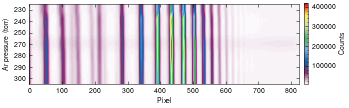

In [7]:
plt.figure(figsize=(5,2))

pressure_array = np.flip(pressure_array[:,200:], axis=1)

plt.imshow(pressure_array, cmap=my_cmap, aspect=35)
# plt.colorbar(fraction=0.04575, pad=0.04, label="Counts")

plt.yticks(np.arange(7), ["230", "240", "250", "270", "280", "290", "300"])
plt.minorticks_off()
plt.xlabel("Pixel")
plt.ylabel("Ar pressure (torr)")
plt.colorbar(fraction=0.0145, pad=0.02, label="Counts")

plt.savefig("figures/pressurescan.jpg", dpi=800)

plt.show()